<a href="https://colab.research.google.com/github/Bambillo1/ComputerVision/blob/main/Pneumonia_Prediction_With_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!gdown --id  1FgcBKk-ux3WaKgWk06bgY1q2Le_vVmpJ

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FgcBKk-ux3WaKgWk06bgY1q2Le_vVmpJ
To: /content/pneumonia.zip
100% 2.46G/2.46G [00:48<00:00, 50.7MB/s]


In [ ]:
!unzip pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
#Classification  values
targets = ['PNEUMONIA', 'NORMAL']

#image size
img_size = 100
def training_data(data_dir):

    #Creating an empty list to store images of pneumonia and normal  x-rays
    data = []
    #Loop through the targets list above to resize each image and convert to numpy arrays
    for target in targets:
        path = os.path.join(data_dir, target)
        class_num = targets.index(target)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                # Reshaping images to preferred size
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train = training_data("chest_xray/chest_xray/train")

test = training_data("chest_xray/chest_xray/test")

val = training_data("chest_xray/chest_xray/val")

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<ipython-input-6-92b525af06e7>:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [ ]:
cnt= []

for i in train:

    if(i[1] == 0):

        cnt.append("Pneumonia")

    else:

        cnt.append("Normal")

sns.set_style('darkgrid')

sns.countplot(cnt)

NameError: ignored

Text(0.5, 1.0, 'NORMAL')

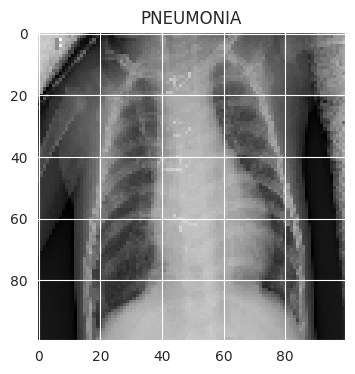

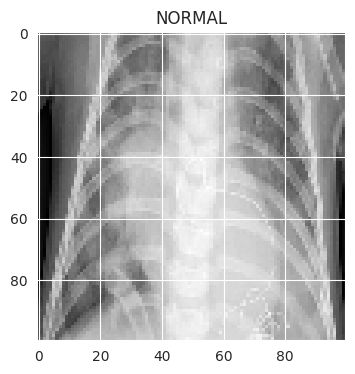

In [ ]:
plt.figure(figsize = (4,4))
plt.imshow(train[0][0], cmap='gray')
plt.title(targets[train[0][1]])

plt.figure(figsize = (4,4))
plt.imshow(train[1][0], cmap='gray')
plt.title(targets[train[-1][1]])

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, target in train:
    x_train.append(feature)
    y_train.append(target)

for feature, target in test:
    x_test.append(feature)
    y_test.append(target)

for feature, target in val:
    x_val.append(feature)
    y_val.append(target)

In [ ]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
image_gen = ImageDataGenerator(
    # set input mean to 0 over the  whole dataset
        featurewise_center=False,
    # set each sample mean to 0
        samplewise_center=False,
    # divide inputs by std of the dataset
        featurewise_std_normalization=False,
    # divide each input by its std
        samplewise_std_normalization=False,
    # apply ZCA whitening
        zca_whitening=False,
     # randomly rotate images in the range (degrees, 0 to 180)

        rotation_range = 30,
      # Randomly zoom image

        zoom_range = 0.2,
    # randomly shift images horizontally (fraction of total width)

        width_shift_range=0.1,
     # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
    # randomly flip images
     horizontal_flip = True,
     # randomly flip images
        vertical_flip=False)


image_gen.fit(x_train)

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (100,100,1)))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_cnn.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_cnn.add(Dropout(0.1))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_cnn.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_cnn.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_cnn.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model_cnn.add(Flatten())
model_cnn.add(Dense(units = 128 , activation = 'relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(units = 1 , activation = 'sigmoid'))
model_cnn.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 100, 100, 32)      320       
                                                                 
 batch_normalization_5 (Batc  (None, 100, 100, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 dropout_4 (Dropout)         (None, 50, 50, 64)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 50, 50, 64)      

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model_cnn.fit(image_gen.flow(x_train,y_train, batch_size = 32) ,epochs = 10 , validation_data = image_gen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/10
163/163 [==============================] - 20s 40ms/step - loss: 0.4955 - accuracy: 0.8359 - val_loss: 15.6522 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
 11/163 [=>............................] - ETA: 5s - loss: 0.3435 - accuracy: 0.8778

In [ ]:
print("Loss of the model is - " , model_cnn.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model_cnn.evaluate(x_test,y_test)[1]*100 , "%")

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
y_pred = model_cnn.predict(x_test)
y_pred = y_pred.reshape(1,-1)[0]
y_pred[:15]

In [ ]:
threshold  = 0.5
y_pred = np.where(y_pred > threshold, 1, 0)
y_pred[:5]

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()

In [ ]:
correct = np.nonzero(y_pred == y_test)[0]
incorrect = np.nonzero(y_pred != y_test)[0]

In [ ]:
i = 0
for c in correct[:4]:
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(100,100), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(y_pred[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [ ]:
i = 0
for c in incorrect[:4]:
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(100,100), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(y_pred[c], y_test[c]))
    plt.tight_layout()
    i += 1